In [95]:
#importing the necessary libraries
#!pip install transformers torch
#pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from wordcloud import WordCloud

In [2]:
# loading the dataset
df=pd.read_csv("netflix.csv")

In [3]:
# printing first 10 rows
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
# printing last 10 rows
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
# shape of the dataset
df.shape

(8807, 12)

In [6]:
# information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# column name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# statistical analysis of dataset
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# dropping the showid column
df.drop(columns=['show_id'],inplace=True)

In [11]:
# viewing the dataset
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [14]:
# Renaming the columns
df.rename(columns={"type":"Type","title":"Title","director":"Director","cast":"Cast","country":"Country","date_added":"Date Added","release_year":"Release Year","rating":"Rating","duration":"Duration","listed_in":"Genre","description":"Description"},inplace=True)

In [18]:
# finding unique values in the dataset
df.nunique(axis=0)

Type               2
Title           8807
Director        4528
Cast            7692
Country          748
Date Added      1767
Release Year      74
Rating            17
Duration         220
Genre            514
Description     8775
dtype: int64

In [19]:
# finding the null values
df.isnull().sum()

Type               0
Title              0
Director        2634
Cast             825
Country          831
Date Added        10
Release Year       0
Rating             4
Duration           3
Genre              0
Description        0
dtype: int64

In [21]:
# printing percentage of null data
print("Percentage of null data in each column")
df.isnull().sum()/len(df)*100


Percentage of null data in each column


Type             0.000000
Title            0.000000
Director        29.908028
Cast             9.367549
Country          9.435676
Date Added       0.113546
Release Year     0.000000
Rating           0.045418
Duration         0.034064
Genre            0.000000
Description      0.000000
dtype: float64

In [26]:
# finding the duplicated data
df.duplicated().sum()

0

In [27]:
# viewing the null entries of the 'Duration' column
df[df["Duration"].isnull()]

,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [28]:
# drop null rows of duration column
df.dropna(subset=['Duration'],inplace=True)

In [29]:
# drop null rows of rating column
df.dropna(subset=['Rating'],inplace=True)

In [31]:
# drop null rows of date added column
df.dropna(subset=['Date Added'],inplace=True)

In [32]:
# printing percentage of null data afetr dropping the null values
print("Percentage of null data in each column")
df.isnull().sum()/len(df)*100

Percentage of null data in each column


Type             0.000000
Title            0.000000
Director        29.817975
Cast             9.385666
Country          9.431172
Date Added       0.000000
Release Year     0.000000
Rating           0.000000
Duration         0.000000
Genre            0.000000
Description      0.000000
dtype: float64

In [37]:
# filling the null values of the country column
df['Country'].fillna('Unknown',inplace=True)

/var/folders/5w/j_ftmgr94_z97p82rqtr29340000gn/T/ipykernel_5441/3022381295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown',inplace=True)


In [38]:
# filling the null values of the cast column
df['Cast'].fillna('N/A',inplace=True)

/var/folders/5w/j_ftmgr94_z97p82rqtr29340000gn/T/ipykernel_5441/3706210538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cast'].fillna('N/A',inplace=True)


In [39]:
# dropping the null values of director column
df.dropna(subset=['Director'],inplace=True)

In [40]:
# printing percentage of null data afetr fixing the dataset
print("Percentage of null data in each column")
df.isnull().sum()/len(df)*100

Percentage of null data in each column


Type            0.0
Title           0.0
Director        0.0
Cast            0.0
Country         0.0
Date Added      0.0
Release Year    0.0
Rating          0.0
Duration        0.0
Genre           0.0
Description     0.0
dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6169 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          6169 non-null   object
 1   Title         6169 non-null   object
 2   Director      6169 non-null   object
 3   Cast          6169 non-null   object
 4   Country       6169 non-null   object
 5   Date Added    6169 non-null   object
 6   Release Year  6169 non-null   int64 
 7   Rating        6169 non-null   object
 8   Duration      6169 non-null   object
 9   Genre         6169 non-null   object
 10  Description   6169 non-null   object
dtypes: int64(1), object(10)
memory usage: 578.3+ KB


In [44]:
# finding the movies made in India
df[df['Country']=='India']

,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
116,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,"September 2, 2021",2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
...,...,...,...,...,...,...,...,...,...,...,...
8772,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8773,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8798,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


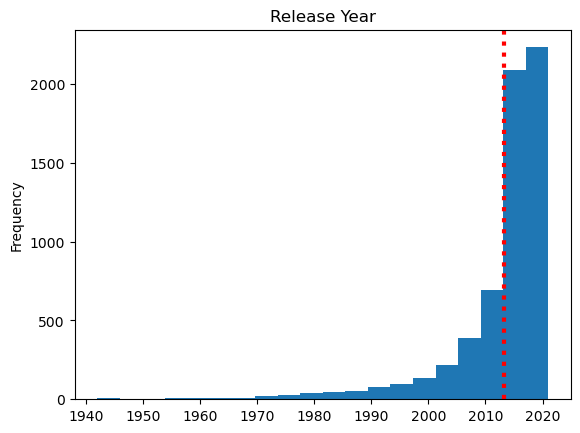

In [46]:
# Graph of Release_Year along its frequency
df['Release Year'].plot(kind='hist', bins=20, title='Release Year')
plt.axvline(x=df['Release Year'].mean(),color='red',linewidth=3, linestyle=':')
plt.show()

Text(0.5, 1.0, 'Top 10 Movie Ratings')

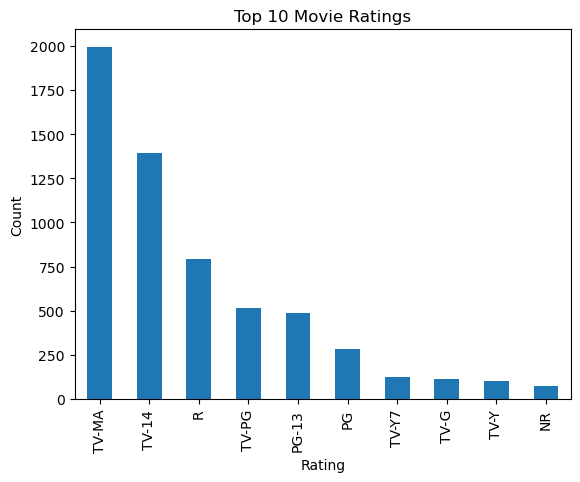

In [47]:
df[df['Type'] == 'Movie']['Rating'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Top 10 Movie Ratings')

Text(0.5, 1.0, 'Content Rating Distribution')

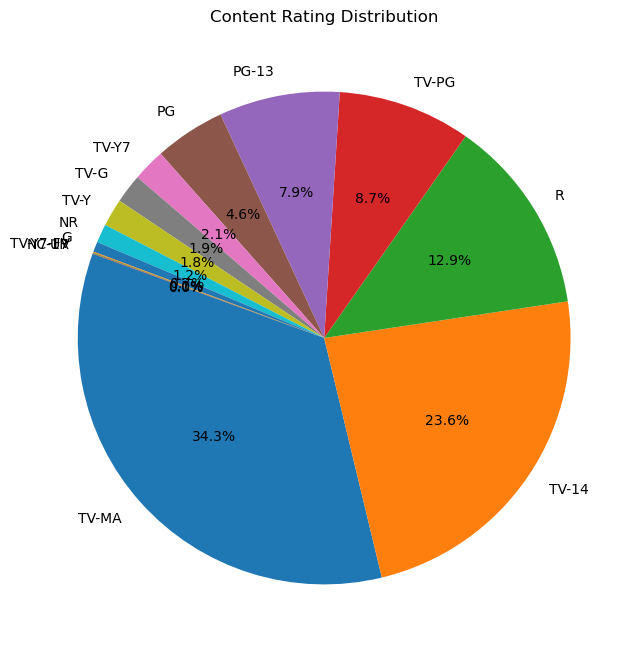

In [48]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=160)
plt.title('Content Rating Distribution')


Text(0.5, 1.0, 'Top 10 countries with the most content')

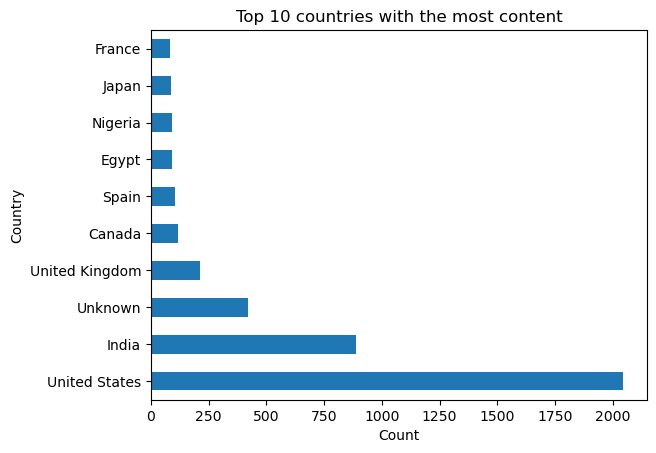

In [49]:
df['Country'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 countries with the most content')

Text(0, 0.5, 'Number of Titles')

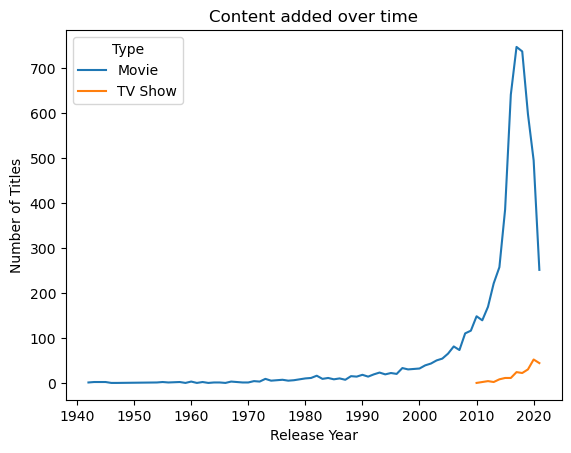

In [51]:
df.groupby(['Release Year', 'Type']).size().unstack().plot(kind='line')
plt.title('Content added over time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

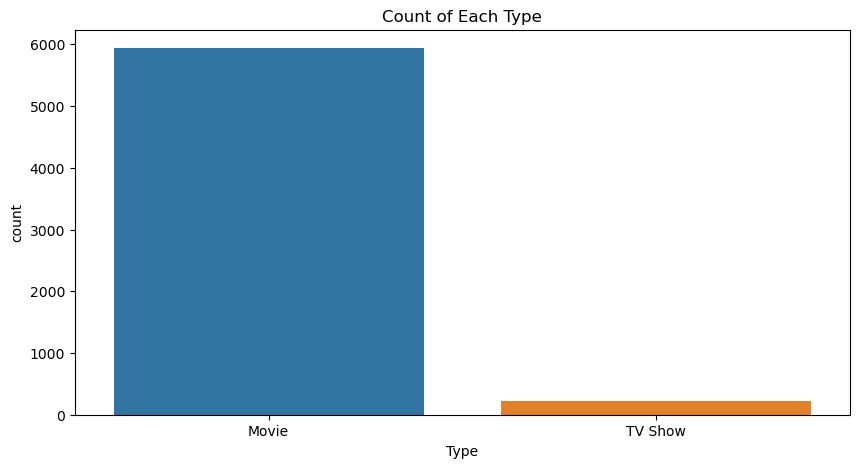

In [61]:
# countplot of type column with label present at top of bar
plt.figure(figsize=(10,5))
sns.countplot(x='Type',data=df,hue="Type")
plt.title('Count of Each Type')
plt.show()


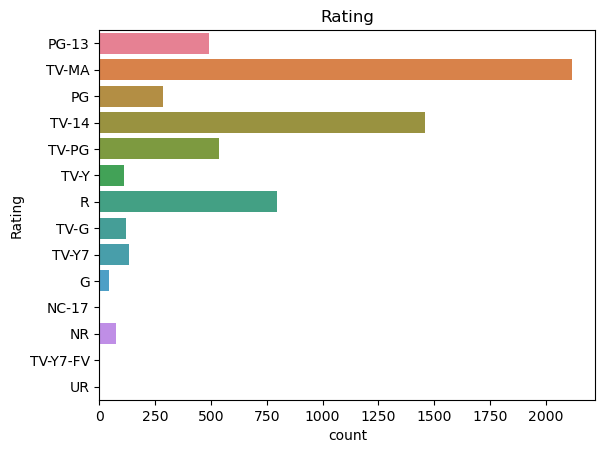

In [72]:
sns.countplot(y='Rating', data=df, hue='Rating')
plt.title('Rating')
plt.show()

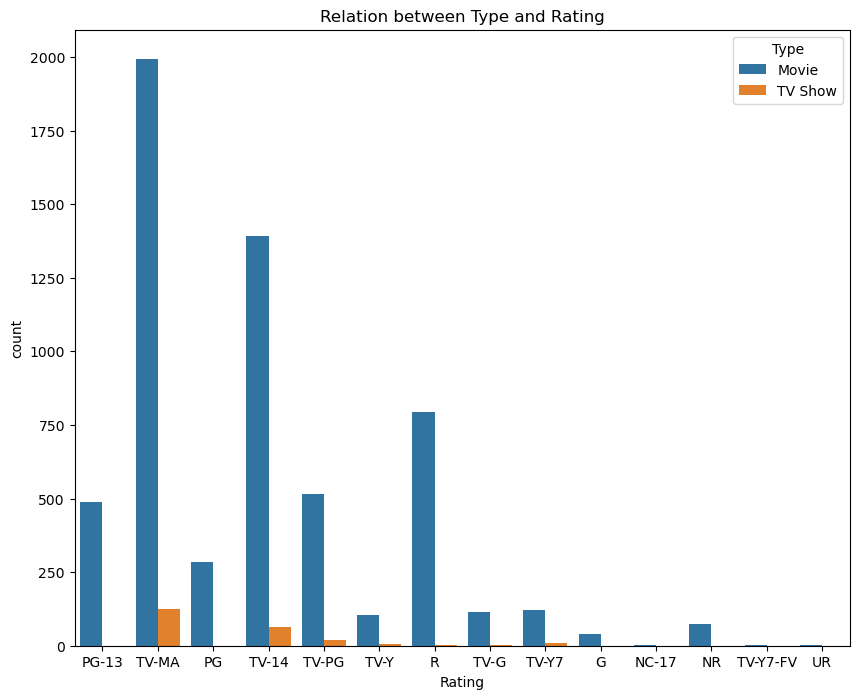

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(x='Rating',hue='Type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

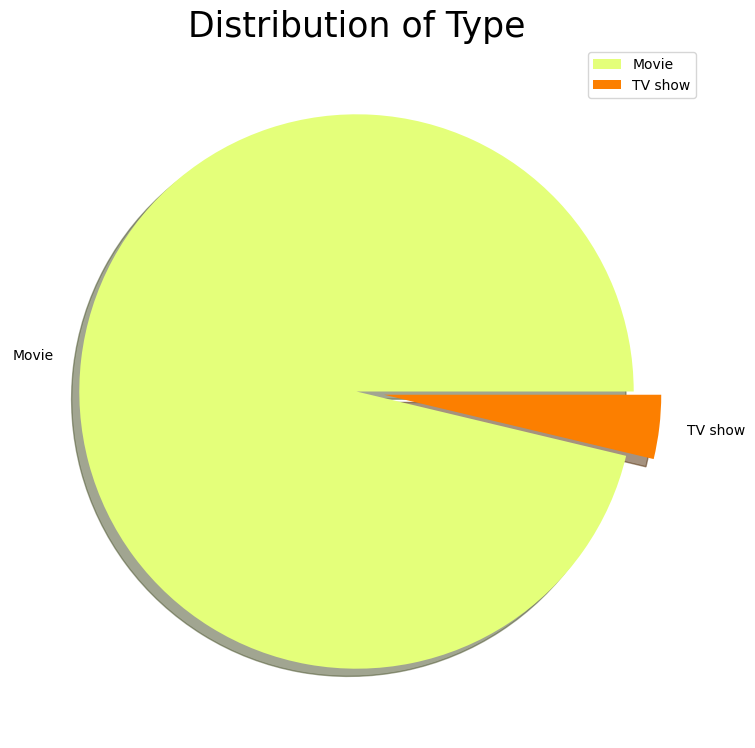

In [78]:
labels = ['Movie', 'TV show']
size = df['Type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

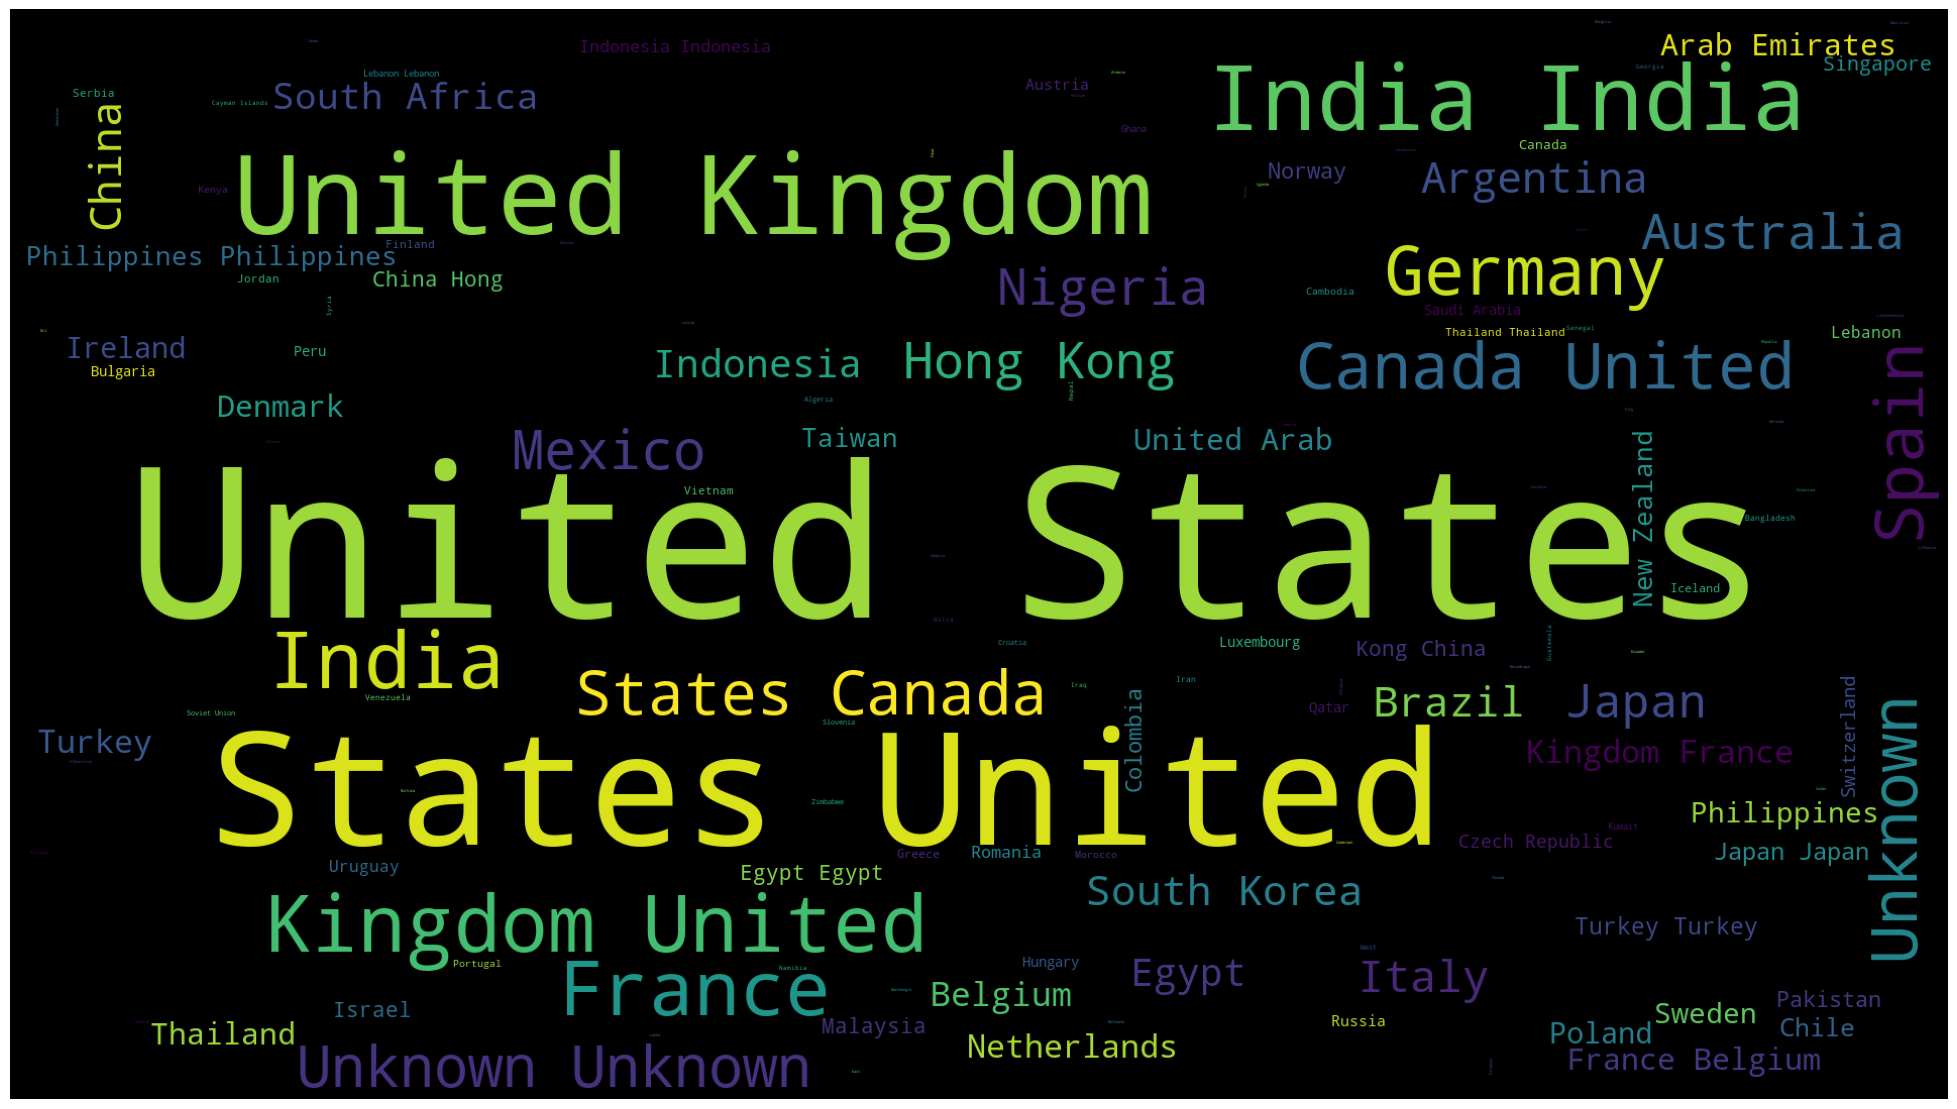

In [84]:
# Wordcloud of countries
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()


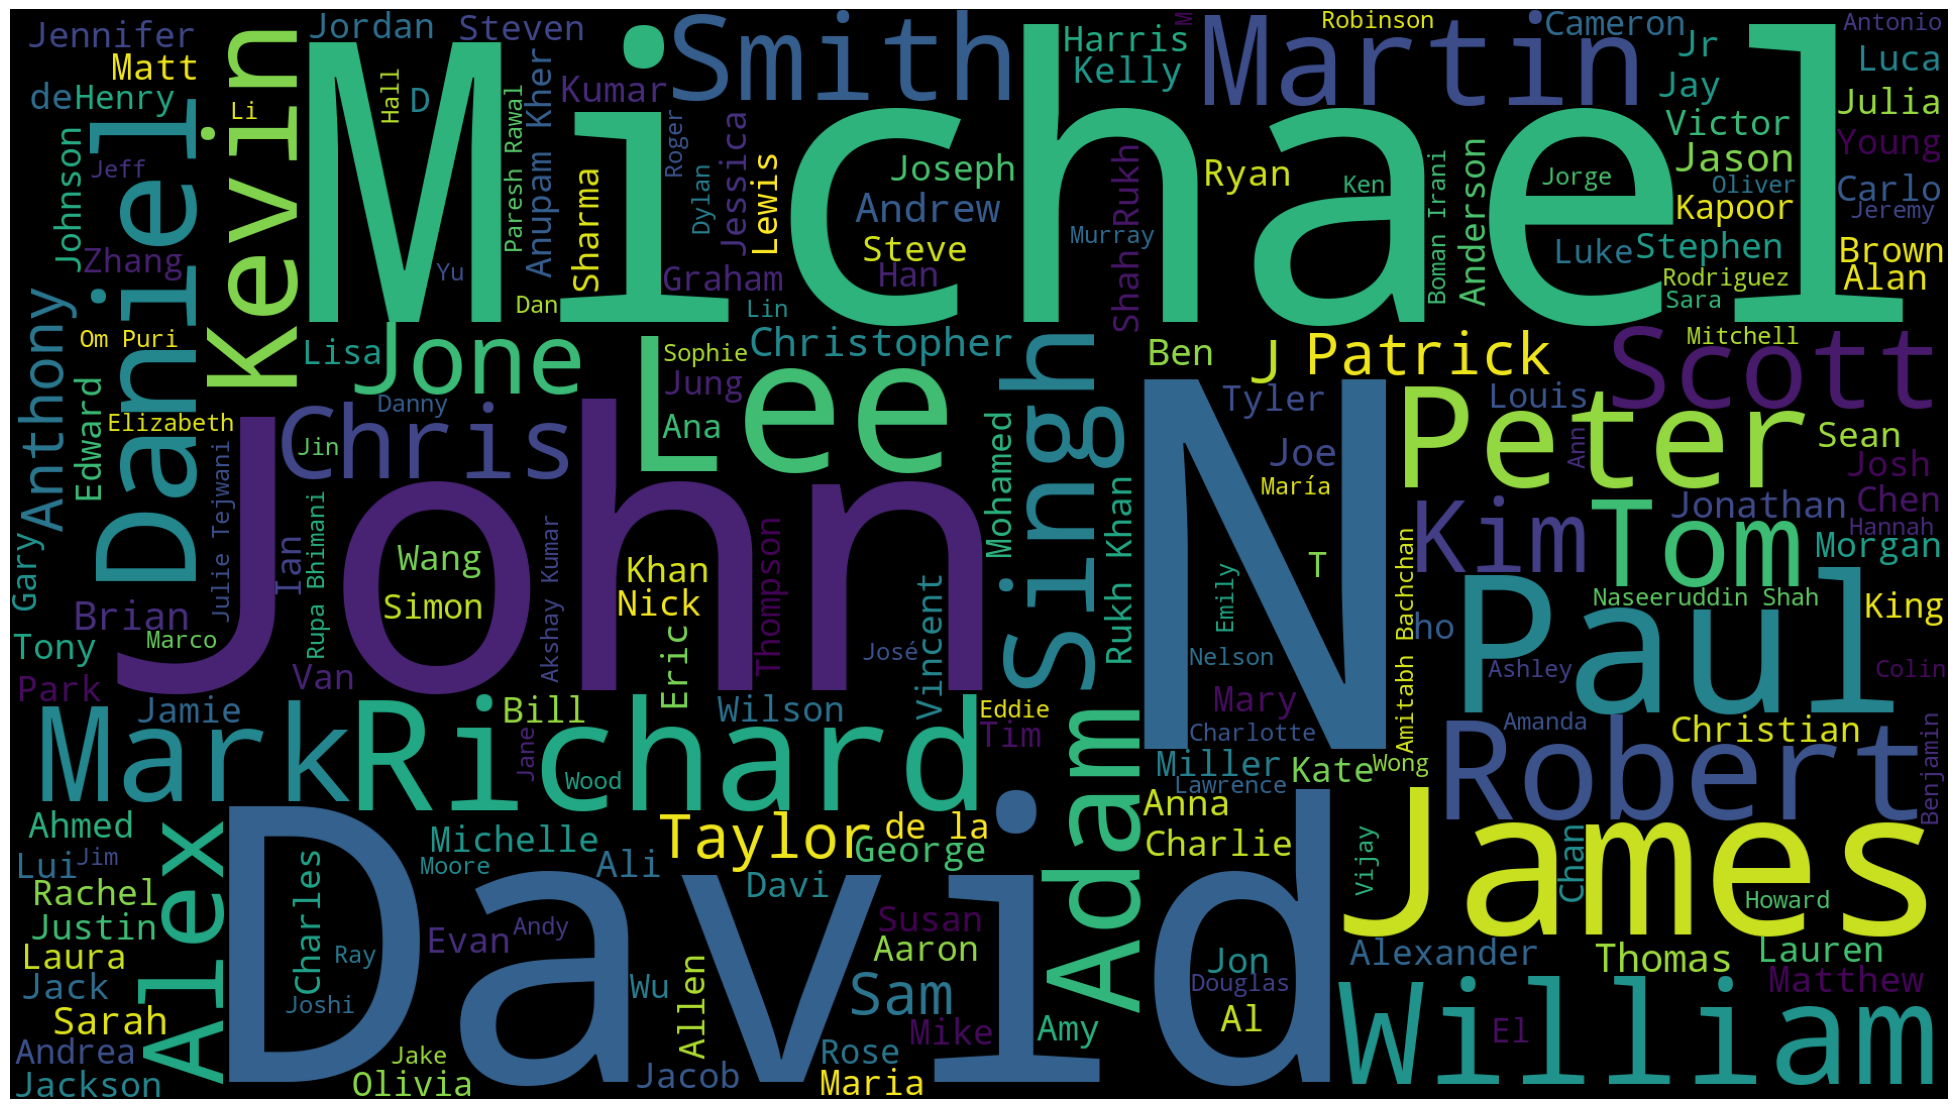

In [86]:
# wordcloud of cast column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                        background_color='Black',
                        width=1920,
                        height=1080
                        ).generate(" ".join(df.Cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

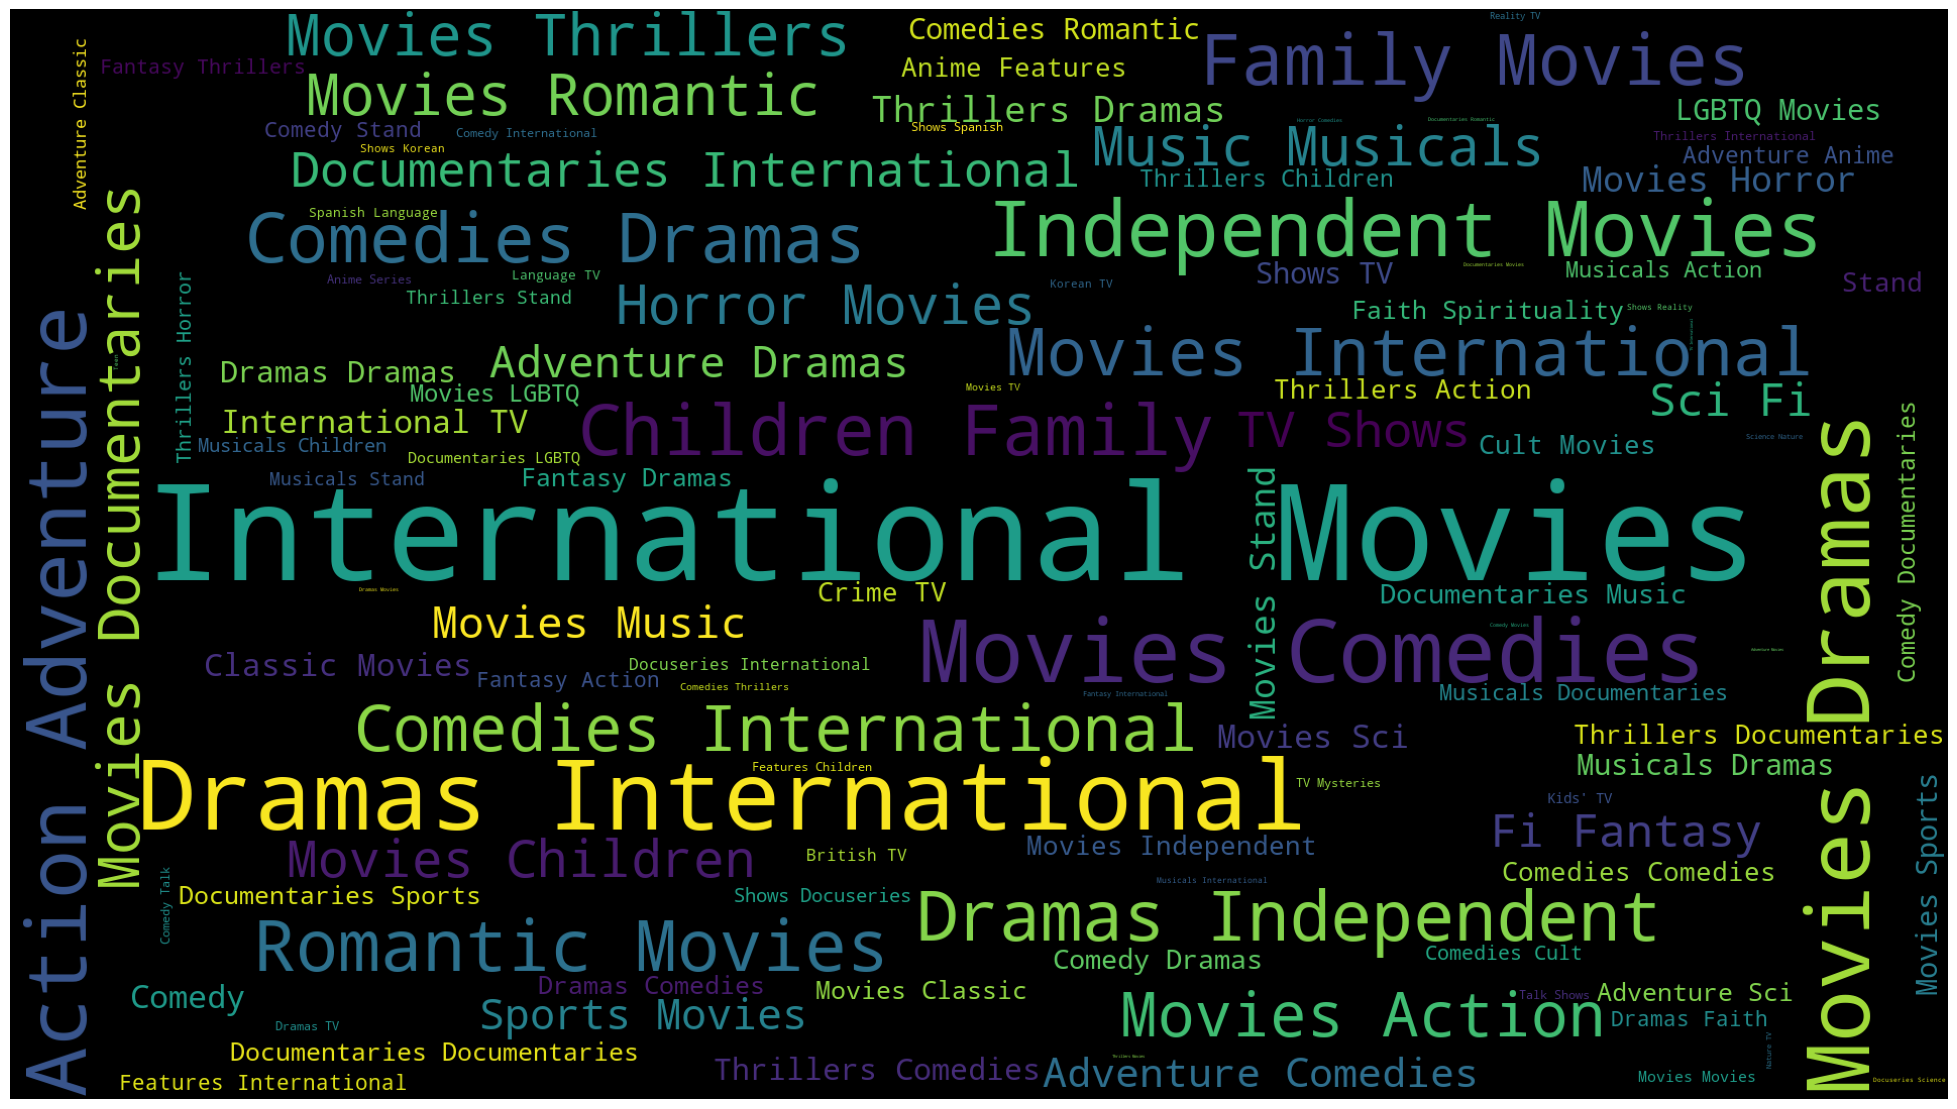

In [87]:
# wordcloud for categories column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                        background_color='Black',
                        width=1920,
                        height=1080
                        ).generate(" ".join(df.Genre))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('categories.png')
plt.show()

/var/folders/5w/j_ftmgr94_z97p82rqtr29340000gn/T/ipykernel_5441/1553396684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Release Year'], color='blue')


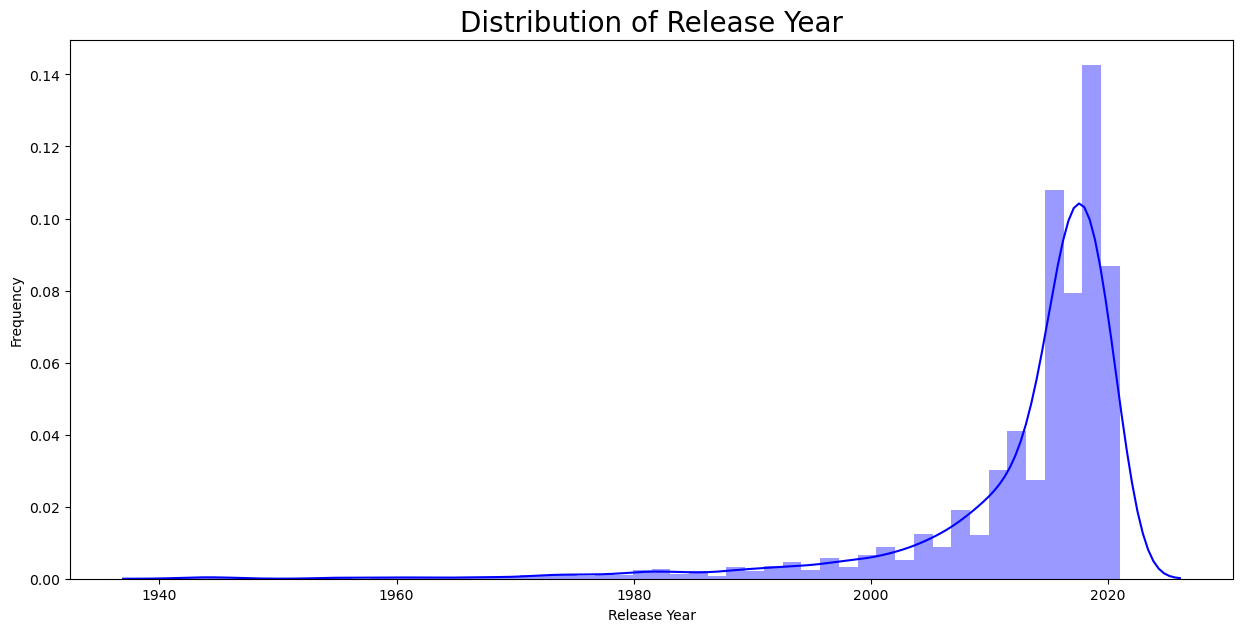

In [90]:
# distplot
plt.figure(figsize=(15,7))
sns.distplot(df['Release Year'], color='blue')
plt.title('Distribution of Release Year', fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

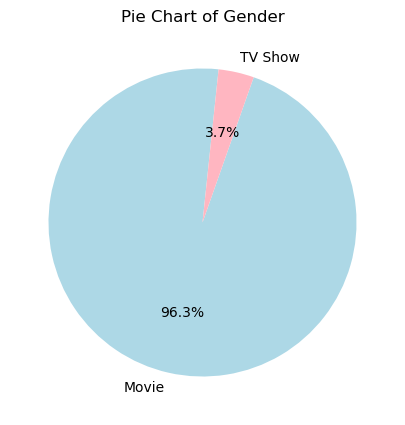

In [91]:
# Advanced Pie Chart
plt.figure(figsize=(8, 5))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=84)

# Adding labels and title
plt.title('Pie Chart of Gender')
plt.ylabel('')
plt.show()

In [99]:
# implementing the Machine learning model

def translate_text(text, source_lang='en', target_lang='es', model_name=None):
    """
    Function to translate text from source language to target language using a pre-trained translation model.

    :param text: The text to be translated.
    :param source_lang: Source language code
    :param target_lang: Target language code
    :param model_name: The name of the pre-trained translation model to use.
    """
    # Define model names for specific language pairs
    model_names = {
        ('en', 'es'): 'Helsinki-NLP/opus-mt-en-es',
        ('es', 'en'): 'Helsinki-NLP/opus-mt-es-en',
        ('en', 'fr'): 'Helsinki-NLP/opus-mt-en-fr',
        ('fr', 'en'): 'Helsinki-NLP/opus-mt-fr-en',
        ('en', 'de'): 'Helsinki-NLP/opus-mt-en-de',
        ('de', 'en'): 'Helsinki-NLP/opus-mt-de-en',
    }

    # Select the appropriate model - Helsinki NLP Model (it has translation dataset of over 100 thousand rows)
    if model_name is None:
        model_name = model_names.get((source_lang, target_lang))
        if model_name is None:
            raise ValueError(f"Model for translating from {source_lang} to {target_lang} not available.")

    # Loading the translation pipeline with the specified model
    translator = pipeline("translation", model=model_name)

    # Generating the translated text
    translation = translator(text)

    # Extract and return the translated text
    return translation[0]['translation_text']


In [102]:
import sentencepiece


In [103]:
if __name__ == "__main__":
    # Example text
    document_text = "Good Morning"

    # Translate from English to Spanish
    translated_text = translate_text(document_text, source_lang='en', target_lang='es')

    # Print the translated text
    print("Translated Text:")
    print(translated_text)

ValueError: This tokenizer cannot be instantiated. Please make sure you have `sentencepiece` installed in order to use this tokenizer.